=== Gaussian Data ===
KL Divergence (X-axis): 0.2744
KL Divergence (Y-axis): 0.1474
Average KL Divergence: 0.2109

=== Banana Data ===
KL Divergence (X-axis): 0.3269
KL Divergence (Y-axis): 0.5914
Average KL Divergence: 0.4592


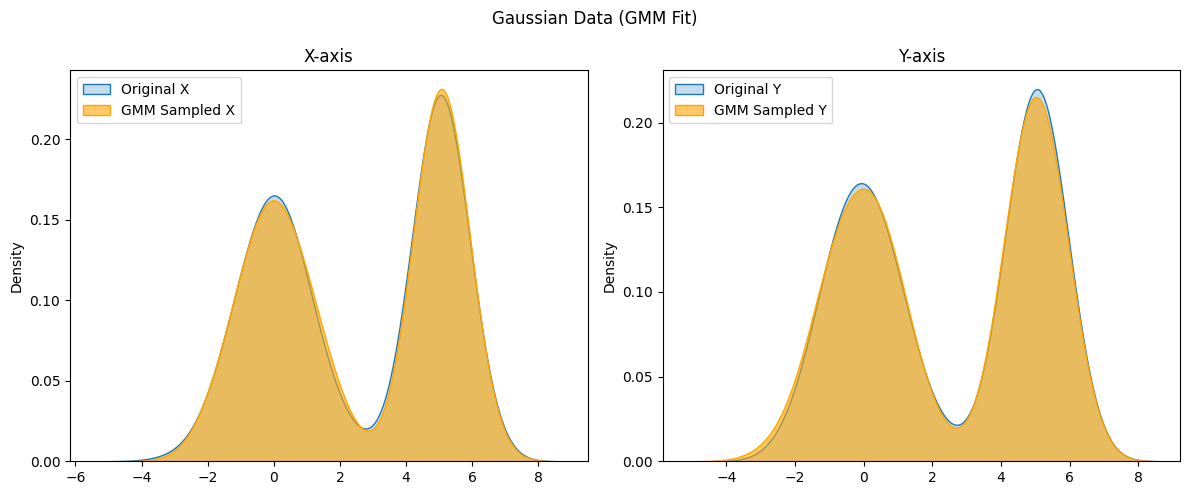

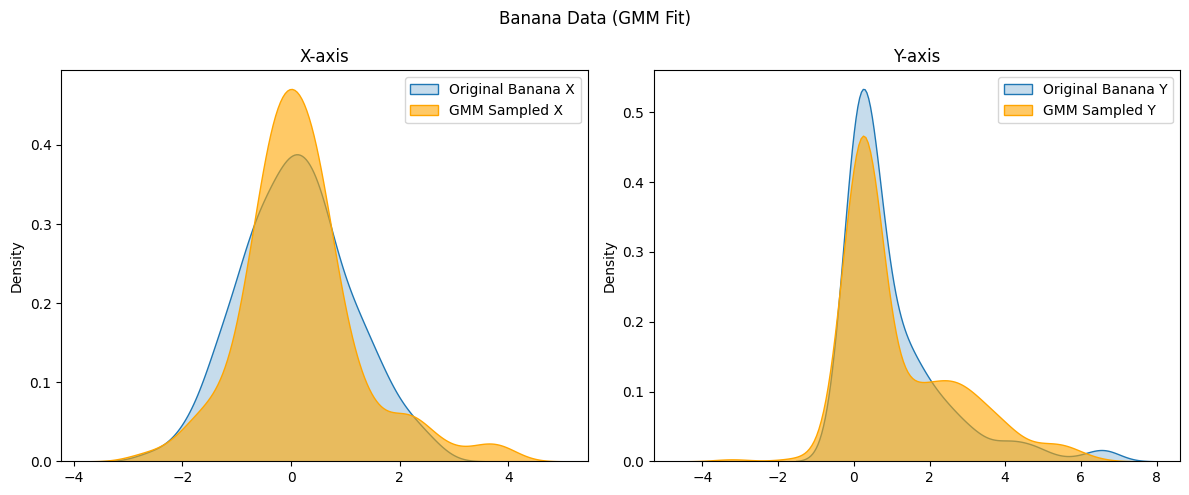

In [3]:
# Evaluate GMM Fit on Gaussian and Non-Gaussian Data Using KL Divergence

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from scipy.stats import entropy



np.random.seed(42)

# Gaussian Clusters
gaussian1 = np.random.normal(loc=0, scale=1.0, size=(300, 2))
gaussian2 = np.random.normal(loc=5, scale=0.5, size=(300, 2))
X = np.vstack([gaussian1, gaussian2])  # Combined Gaussian data

# Non-Gaussian: Banana shape
x = np.random.normal(0, 1, 300)
y = x**2 + np.random.normal(0, 0.1, 300)
banana = np.stack([x, y], axis=1)


#  Fit GMMs and Generate Samples


# GMM on Gaussian data
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(X)
generated_gaussian, _ = gmm.sample(n_samples=600)

# GMM on Banana data
gmm_banana = GaussianMixture(n_components=2, covariance_type='full')
gmm_banana.fit(banana)
generated_banana, _ = gmm_banana.sample(n_samples=300)


# KL Divergence Function


def compute_kl_divergence(true_data, generated_data, bins=50):
    hist_true, bin_edges = np.histogram(true_data, bins=bins, density=True)
    hist_gen, _ = np.histogram(generated_data, bins=bin_edges, density=True)

    # Add small epsilon to avoid division by zero
    hist_true += 1e-8
    hist_gen += 1e-8

    # Normalize
    hist_true /= np.sum(hist_true)
    hist_gen /= np.sum(hist_gen)

    return entropy(hist_true, hist_gen)


# KL Divergence Scores


# Gaussian
kl_x = compute_kl_divergence(X[:, 0], generated_gaussian[:, 0])
kl_y = compute_kl_divergence(X[:, 1], generated_gaussian[:, 1])
print("=== Gaussian Data ===")
print(f"KL Divergence (X-axis): {kl_x:.4f}")
print(f"KL Divergence (Y-axis): {kl_y:.4f}")
print(f"Average KL Divergence: {(kl_x + kl_y) / 2:.4f}")

# Banana
kl_bx = compute_kl_divergence(banana[:, 0], generated_banana[:, 0])
kl_by = compute_kl_divergence(banana[:, 1], generated_banana[:, 1])
print("\n=== Banana Data ===")
print(f"KL Divergence (X-axis): {kl_bx:.4f}")
print(f"KL Divergence (Y-axis): {kl_by:.4f}")
print(f"Average KL Divergence: {(kl_bx + kl_by) / 2:.4f}")


# 📊 5. KDE Plots - Gaussian

plt.figure(figsize=(12, 5))
plt.suptitle("Gaussian Data (GMM Fit)")

plt.subplot(1, 2, 1)
sns.kdeplot(X[:, 0], label='Original X', fill=True)
sns.kdeplot(generated_gaussian[:, 0], label='GMM Sampled X', fill=True, alpha=0.6, color='orange')
plt.title("X-axis")
plt.legend()

plt.subplot(1, 2, 2)
sns.kdeplot(X[:, 1], label='Original Y', fill=True)
sns.kdeplot(generated_gaussian[:, 1], label='GMM Sampled Y', fill=True, alpha=0.6, color='orange')
plt.title("Y-axis")
plt.legend()

plt.tight_layout()
plt.show()


# 📊 6. KDE Plots - Banana


plt.figure(figsize=(12, 5))
plt.suptitle("Banana Data (GMM Fit)")

plt.subplot(1, 2, 1)
sns.kdeplot(banana[:, 0], label='Original Banana X', fill=True)
sns.kdeplot(generated_banana[:, 0], label='GMM Sampled X', fill=True, alpha=0.6, color='orange')
plt.title("X-axis")
plt.legend()

plt.subplot(1, 2, 2)
sns.kdeplot(banana[:, 1], label='Original Banana Y', fill=True)
sns.kdeplot(generated_banana[:, 1], label='GMM Sampled Y', fill=True, alpha=0.6, color='orange')
plt.title("Y-axis")
plt.legend()

plt.tight_layout()
plt.show()
